# Define functions

In [1]:
from math import gcd
def get_vectors(n):
    vectors = []
    i = 2
    while len(vectors) < n:
        vectors += [(i, j) for j in range(1,i) if gcd(i,j)==1]
        i += 1
    
    lengths = map(lambda v: v[0]**2 + v[1]**2, vectors + [(0,0)])
    
    for i in range(i, int(max(lengths)**0.5) + 2):
        vectors += [(i, j) for j in range(1,i) if gcd(i,j)==1]
        
    vectors.sort(key = lambda v: v[0]**2 + v[1]**2)
    vectors = vectors[:n]
    vectors.sort(key=lambda x: x[1]/x[0], reverse = True)

    return [(0,1)] + list(map(lambda x: (x[1], x[0]), reversed(vectors))) + [(1,1)]  + vectors
    

def get_shape(n):
    vectors = []     
    
    vectors = get_vectors((n-1)//8)
    
    max_val, max_idx = 0,0
    for i, val in enumerate(map(lambda x: x[0]**2+x[1]**2, vectors)):
        if val > max_val:
            max_val, max_idx = val, i
            
    if 0<n%8<=4 :
        del vectors[max_idx]
        max_val, max_idx = 0,0
        for i, val in enumerate(map(lambda x: x[0]**2+x[1]**2, vectors)):
            if val > max_val:
                max_val, max_idx = val, i
                
    points = [(0,0)]
    #Quadrant 1
    for v in vectors:
        next_point = (points[-1][0]+v[0], points[-1][1]+v[1])
        points.append(next_point)
    
    #Quadrant 2
    for i, v in enumerate(vectors):
        if i == max_idx:
            if 0 < n%4 <= 2:
                continue
        next_point = (points[-1][0]+v[1], points[-1][1]-v[0])
        points.append(next_point)
    
    #Quadrant 3
    for v in vectors:
        next_point = (points[-1][0]-v[0], points[-1][1]-v[1])
        points.append(next_point)
    
    #Quadrant 4
    for i, v in enumerate(vectors):
        if i == max_idx:
            if 0 < n%4 <= 2:
                continue
        next_point = (points[-1][0]-v[1], points[-1][1]+v[0])
        points.append(next_point)
    
    del points[-1]
    #assert(isconvex(points))
    return points

def doublearea(points):
    return sum(p2[0]*p1[1]-p2[1]*p1[0] for p1,p2 in zip(points[1:], points[2:]))

# Test

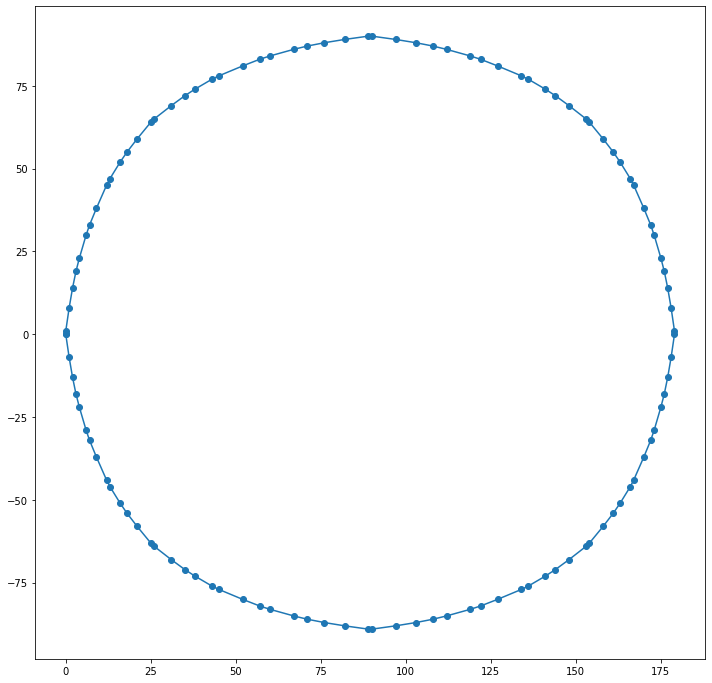

112
49902


In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
shape = get_shape(112)
i,j = zip(*shape)
i = list(i) + [i[0]]
j = list(j) + [j[0]]
plt.plot(i,j)
plt.scatter(i,j)
plt.show()
print(len(shape))
print(doublearea(shape))
#print(shape)

# Comparison with known optimal

In [3]:
length_area_dict = {len(shape): doublearea(shape) for shape in map(get_shape, range(4,42,2))}
best_values = [1, 2, 5, 6, 13, 14, 21, 28, 43, 48, 65, 80, 103, 118, 151, 174, 213, 242, 289, 328, 387, 420, 497, 548]
#from https://gist.github.com/AlephAlpha/7d09076ed6a781ff82ff520280560db7
best_values += [625, 690, 783, 860, 967, 1046, 1177, 1264, 1409, 1498, 1671]

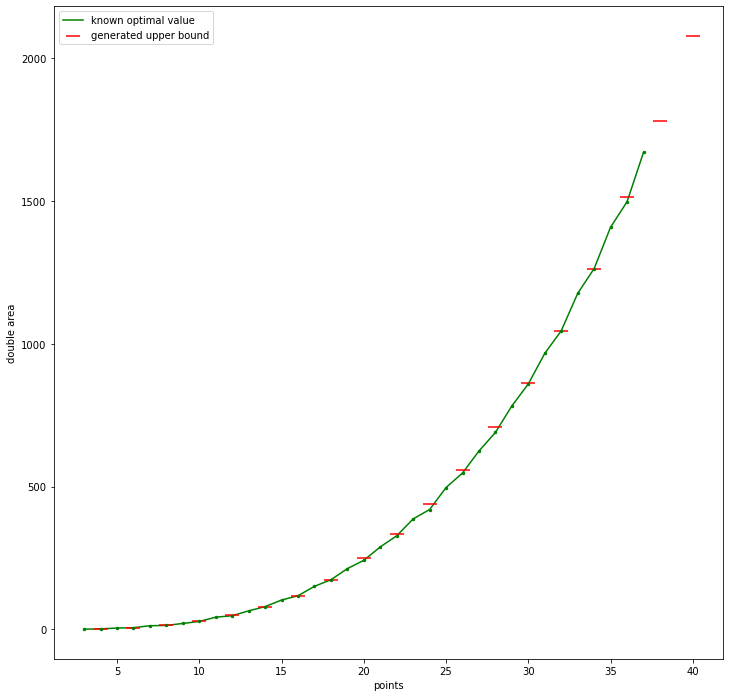

In [4]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.plot(range(3,len(best_values)+3), best_values, c='g', label='known optimal value', zorder=1)
plt.scatter(*zip(*length_area_dict.items()), label='generated upper bound', c='r', marker = '_', s=200, zorder=2)
plt.scatter(range(3,len(best_values)+3), best_values, s=6, c='g', zorder=3)
plt.xlabel('points')
plt.ylabel('double area')
plt.legend()
plt.show()

In [5]:
#Errors (using hacks if n is not multiple of 8)
for i in length_area_dict:
    if i - 3 < len(best_values):
        print("points", i, "optimal area", best_values[i-3], \
              "circle area", length_area_dict[i], \
              "percentage worse", round(100*length_area_dict[i]/best_values[i-3] - 100, 3), "%")

points 4 optimal area 2 circle area 2 percentage worse 0.0 %
points 6 optimal area 6 circle area 6 percentage worse 0.0 %
points 8 optimal area 14 circle area 14 percentage worse 0.0 %
points 10 optimal area 28 circle area 28 percentage worse 0.0 %
points 12 optimal area 48 circle area 52 percentage worse 8.333 %
points 14 optimal area 80 circle area 80 percentage worse 0.0 %
points 16 optimal area 118 circle area 118 percentage worse 0.0 %
points 18 optimal area 174 circle area 174 percentage worse 0.0 %
points 20 optimal area 242 circle area 250 percentage worse 3.306 %
points 22 optimal area 328 circle area 334 percentage worse 1.829 %
points 24 optimal area 420 circle area 438 percentage worse 4.286 %
points 26 optimal area 548 circle area 560 percentage worse 2.19 %
points 28 optimal area 690 circle area 708 percentage worse 2.609 %
points 30 optimal area 860 circle area 864 percentage worse 0.465 %
points 32 optimal area 1046 circle area 1046 percentage worse 0.0 %
points 34 opti

# Scaling

In [6]:
xlimit = 10000
length_area_dict = {len(shape): doublearea(shape) for shape in map(get_shape, range(6,xlimit,2))}

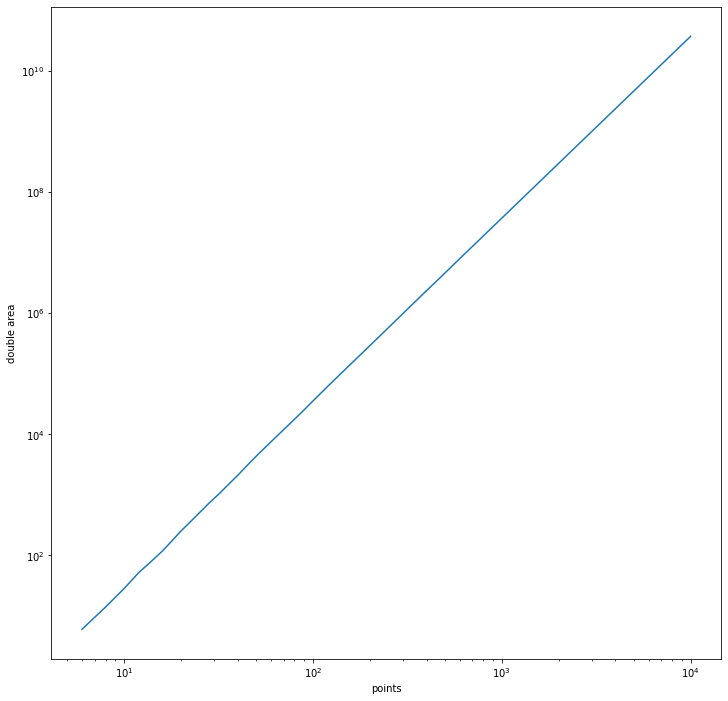

In [7]:
plt.plot(*zip(*length_area_dict.items()))
plt.xlabel('points')
plt.ylabel('double area')
plt.loglog()
plt.show()

In [8]:
from math import log
n1, n2 = 8000, 2000
m = (log(length_area_dict[n1]/length_area_dict[n2]))/(log(n1/n2))
print("slope of loglog plot is", m)
b = length_area_dict[n1]/n1**3
print("line is approximately n^3 /",1/b)

slope of loglog plot is 3.0007051116036325
line is approximately n^3 / 27.027715597459245


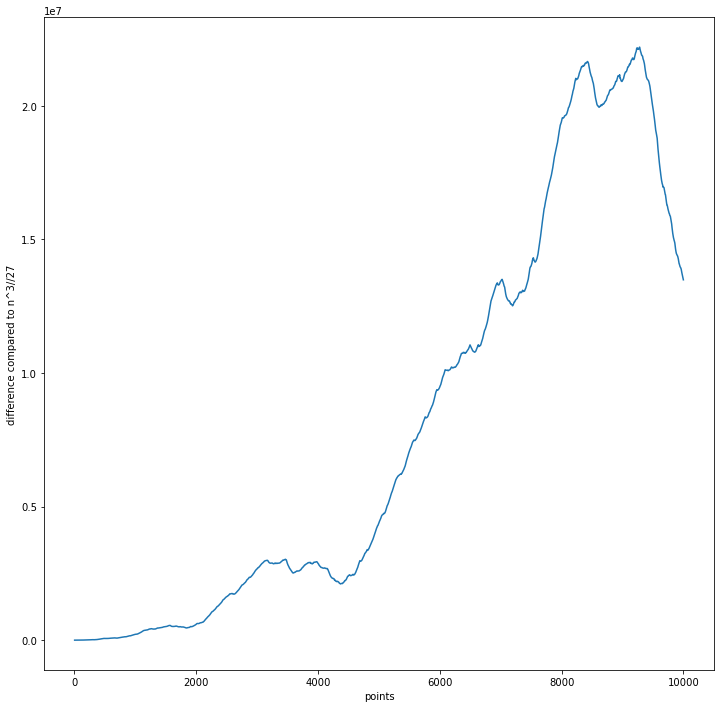

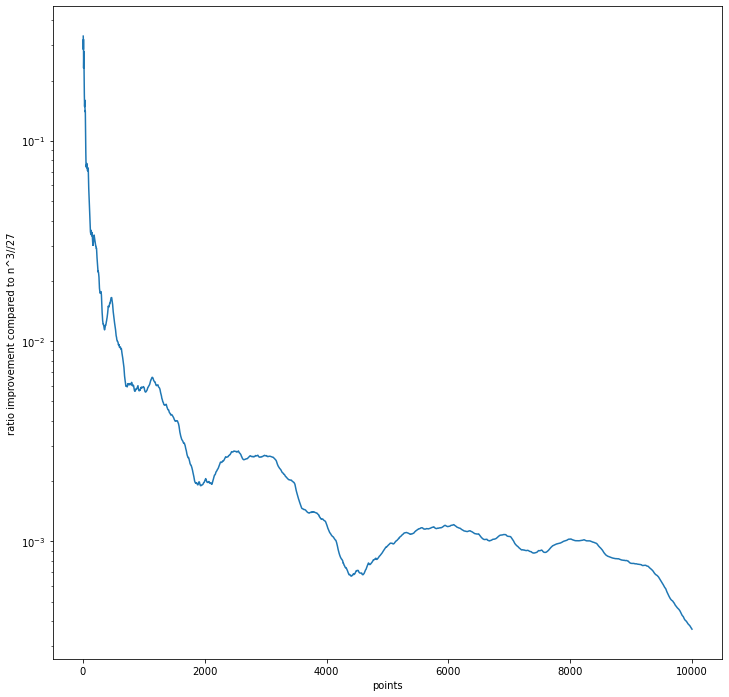

All better than n^3//27


In [9]:
plt.plot(length_area_dict.keys(), [(key**3//27-val) for key,val in length_area_dict.items()])
plt.xlabel('points')
plt.ylabel('difference compared to n^3//27')
plt.show()
plt.plot(length_area_dict.keys(), [(key**3//27-val)/val for key,val in length_area_dict.items()])
plt.xlabel('points')
plt.ylabel('ratio improvement compared to n^3//27')
plt.semilogy()
plt.show()
assert all(key**3//27>val for key,val in length_area_dict.items()), "Some are worse than n//27"
print("All better than n^3//27")

# Even higher scaling

In [10]:
length_area_dict = {len(shape): doublearea(shape) for shape in map(get_shape, map(lambda x: x%10 * (10**(x//10)), range(40,71)))}
del length_area_dict[8]

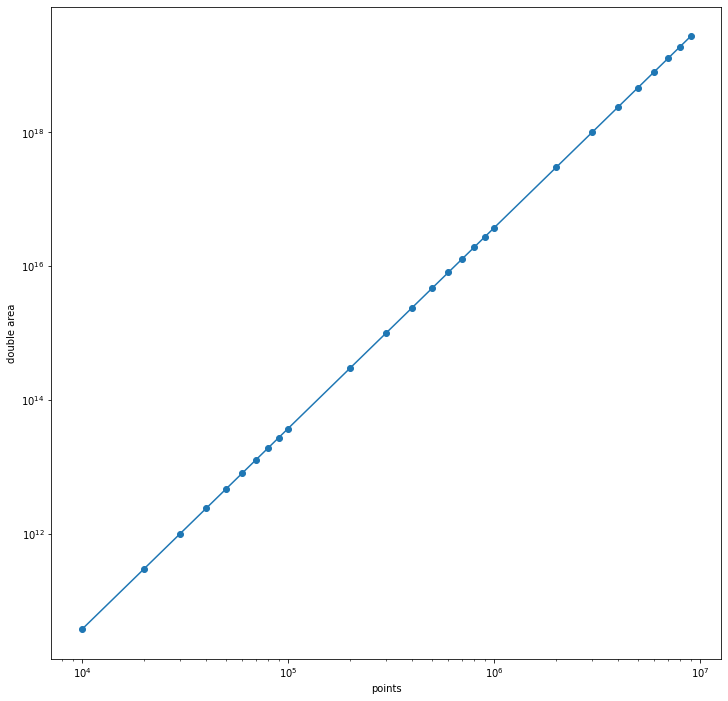

In [11]:
plt.plot(*zip(*length_area_dict.items()))
plt.scatter(*zip(*length_area_dict.items()))
plt.xlabel('points')
plt.ylabel('double area')
plt.loglog()
plt.show()

In [12]:
from math import log
n1, n2 = int(1e4), int(9e6)
m = (log(length_area_dict[n1]/length_area_dict[n2]))/(log(n1/n2))
print("slope of loglog plot is", m)
b = length_area_dict[n1]/n1**3
print("line is approximately n^3 /",1/b)

slope of loglog plot is 3.0000531819454905
line is approximately n^3 / 27.009825075332625


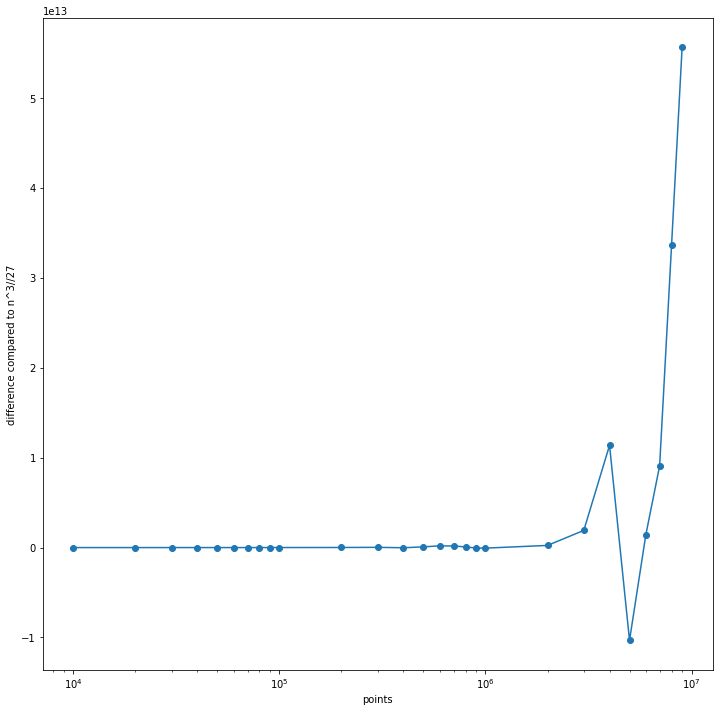

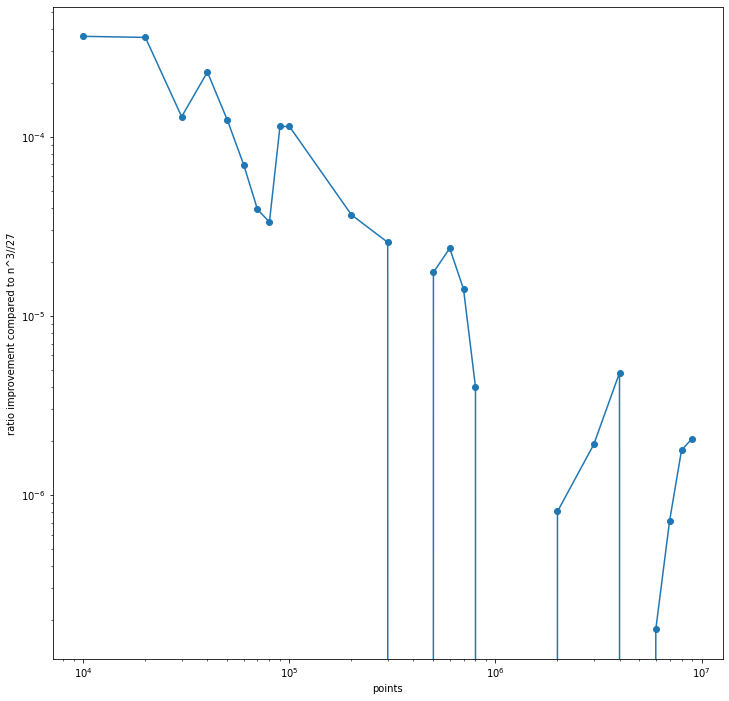

AssertionError: Some are worse than n//27

In [13]:
plt.plot(length_area_dict.keys(), [(key**3//27-val) for key,val in length_area_dict.items()])
plt.scatter(length_area_dict.keys(), [(key**3//27-val) for key,val in length_area_dict.items()])
plt.semilogx()
plt.xlabel('points')
plt.ylabel('difference compared to n^3//27')
plt.show()
plt.plot(length_area_dict.keys(), [(key**3//27-val)/val for key,val in length_area_dict.items()])
plt.scatter(length_area_dict.keys(), [(key**3//27-val)/val for key,val in length_area_dict.items()])
plt.xlabel('points')
plt.ylabel('ratio improvement compared to n^3//27')
plt.loglog()
plt.show()
assert all(key**3//27>val for key,val in length_area_dict.items()), "Some are worse than n//27"
print("All better than n^3//27")